<a href="https://colab.research.google.com/github/ribeirolucas962/RFM2/blob/main/Analise_de_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
data = {
    'customer_id': [1, 1, 2, 2, 3, 3, 3],
    'purchase_date': ['2023-01-01', '2023-02-15', '2023-03-01', '2023-03-20', '2023-02-01', '2023-03-15', '2023-04-01'],
    'purchase_amount': [100, 200, 150, 100, 200, 150, 300]
}

In [ ]:
df=pd.DataFrame(data)
df["purchase_date"] = pd.to_datetime(df['purchase_amount'])

In [ ]:
reference_date = df['purchase_date'].max()+ pd.Timedelta(days=1)

In [ ]:
rfm = df.groupby('customer_id').agg({
    'purchase_date': lambda x: (reference_date - x.max()).days,
    'customer_id': 'count',
    'purchase_amount': 'sum'
}).rename(columns={'purchase_date': 'Recency', 'customer_id': 'Frequency', 'purchase_amount': 'MonetaryValue'})

In [ ]:
def assign_rfm_scores(series, n_bins, labels):

    unique_values = series.nunique()

    if unique_values >= n_bins:
        return pd.qcut(series, q=n_bins, labels=labels[:n_bins], duplicates='drop')
    else:

        return pd.cut(series, bins=unique_values, labels=labels[:unique_values], duplicates='drop')

In [ ]:
rfm['R_Score'] = assign_rfm_scores(rfm['Recency'], 5, [5, 4, 3, 2, 1])
rfm['F_Score'] = assign_rfm_scores(rfm['Frequency'].rank(method='first'), 5, [1, 2, 3, 4, 5])
rfm['M_Score'] = assign_rfm_scores(rfm['MonetaryValue'], 5, [1, 2, 3, 4, 5])

In [ ]:
rfm['RFM_score'] = rfm['R_Score'].astype(str)+rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [ ]:
rfm.head(5)

,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_score
customer_id,,,,,,,
1,1,2,300,5,1,1,511
2,1,2,250,5,2,1,521
3,1,3,650,5,3,3,533


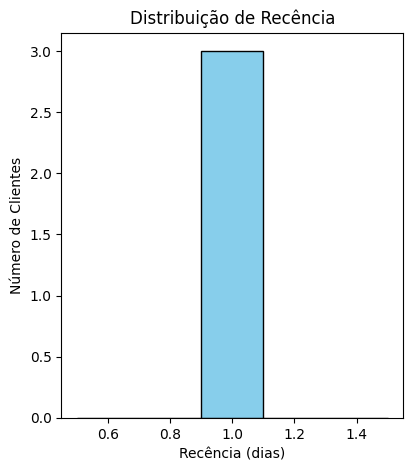

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribuição de Recência')
plt.xlabel('Recência (dias)')
plt.ylabel('Número de Clientes');

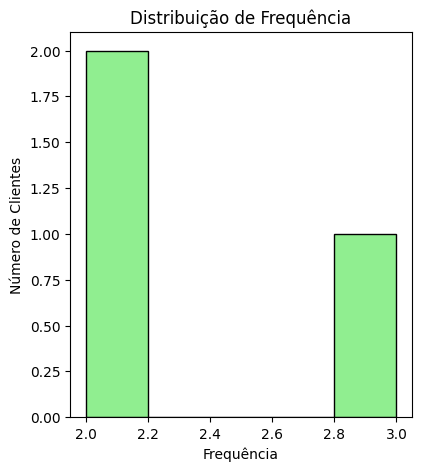

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribuição de Frequência')
plt.xlabel('Frequência')
plt.ylabel('Número de Clientes');

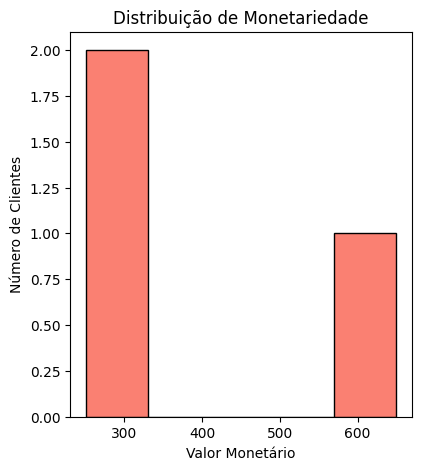

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.hist(rfm['MonetaryValue'], bins=5, color='salmon', edgecolor='black')
plt.title('Distribuição de Monetariedade')
plt.xlabel('Valor Monetário')
plt.ylabel('Número de Clientes');

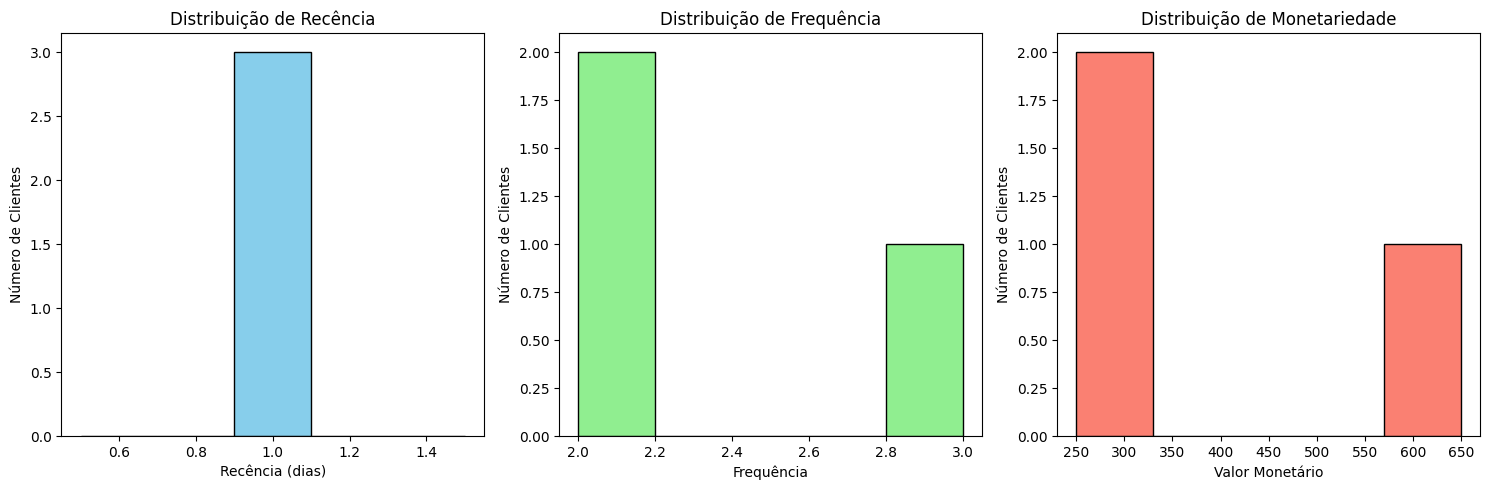

In [ ]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribuição de Recência')
plt.xlabel('Recência (dias)')
plt.ylabel('Número de Clientes')


plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Distribuição de Frequência')
plt.xlabel('Frequência')
plt.ylabel('Número de Clientes')


plt.subplot(1, 3, 3)
plt.hist(rfm['MonetaryValue'], bins=5, color='salmon', edgecolor='black')
plt.title('Distribuição de Monetariedade')
plt.xlabel('Valor Monetário')
plt.ylabel('Número de Clientes')

plt.tight_layout()
plt.show()